# Projeto: Previsão de sucesso de campanha de Marketing (Banco)

As campanhas de <i>marketing</i> e venda constituem uma estratégia típica para potencializar negócios. As empresas utilizam dessas campanhas para atingir metas espefícicas, como por exemplo, a venda de um produto.

Nesse estudo de caso será utilizado dados de uma campanha de <i>telemarketing</i> feita para um banco Português para vender depósitos bancários de longo prazo. Os dados foram coletados entre os<b> anos de 2008 e 2013</b>. O banco de dados possui 16 variáveis independentes e uma variável dependente, descritas abaixo.

O estudo de caso consistiu primeiramente em realização uma análise exploratória dos dados, afim de extrair insights sobre o negócio e posteriomente foi realizada a criação de um modelo de classificação baseado na técnica de <b>Florestas Aleatórias</b>, que classifica quais os clientes farão ou não o depósito bancário. Este modelo poderá ser utilizado futuramente em campanhas de <i>marketing</i>, para que seja definido melhor o publico alvo das campanhas, otimizando assim os custos operacionais desse tipo de capitação de clientes.

<b>Descrição das variáveis:
- <b>Variáveis de entrada</b>
    - Age: Idade do cliente
    - Job: Profissão do cliente
    - marital: Estado civil
    - education: Nível educacional
    - default: Inadimplência do cliente
    - housing: Empréstimo imobiliário
    - loan: Empréstimo pessoal
    - contact: Tipo de comunicação feita
    - month: Mês do último contato
    - day_of_week: Dia do último contato
    - duration: Duração do último contato
    - campaign: Número de ligações feitas ao cliente durante a campanha
    - pdays: Número de dias passado depois que o cliente foi contactado pela última vez em campanha anterior
    - previous: Número de contatos realizados antes desta campanha e para este cliente
    - poutcome: Resultado da campanha anterior
    - balance: Saldo em conta bancária
- <b>Variável de saída</b>
    - O cliente realizou o depósito bancário (Investimento)? sim/não

### Ferramentas e dados utilizados:
- <b> Manipulação, limpeza e análise exploratória dos dados:</b> Pandas, Numpy, missingno, scipy, imbalanced-learn;
- <b> Visualização dos dados:</b> matplotlib, seaborn;
- <b><i> Machine Learning:</b></i> Classificação (scikit-learn)
- <b> Fonte dos dados:</b> https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno

## Importando o banco de dados

In [2]:
df = pd.read_csv("bank-full.csv", sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<AxesSubplot:>

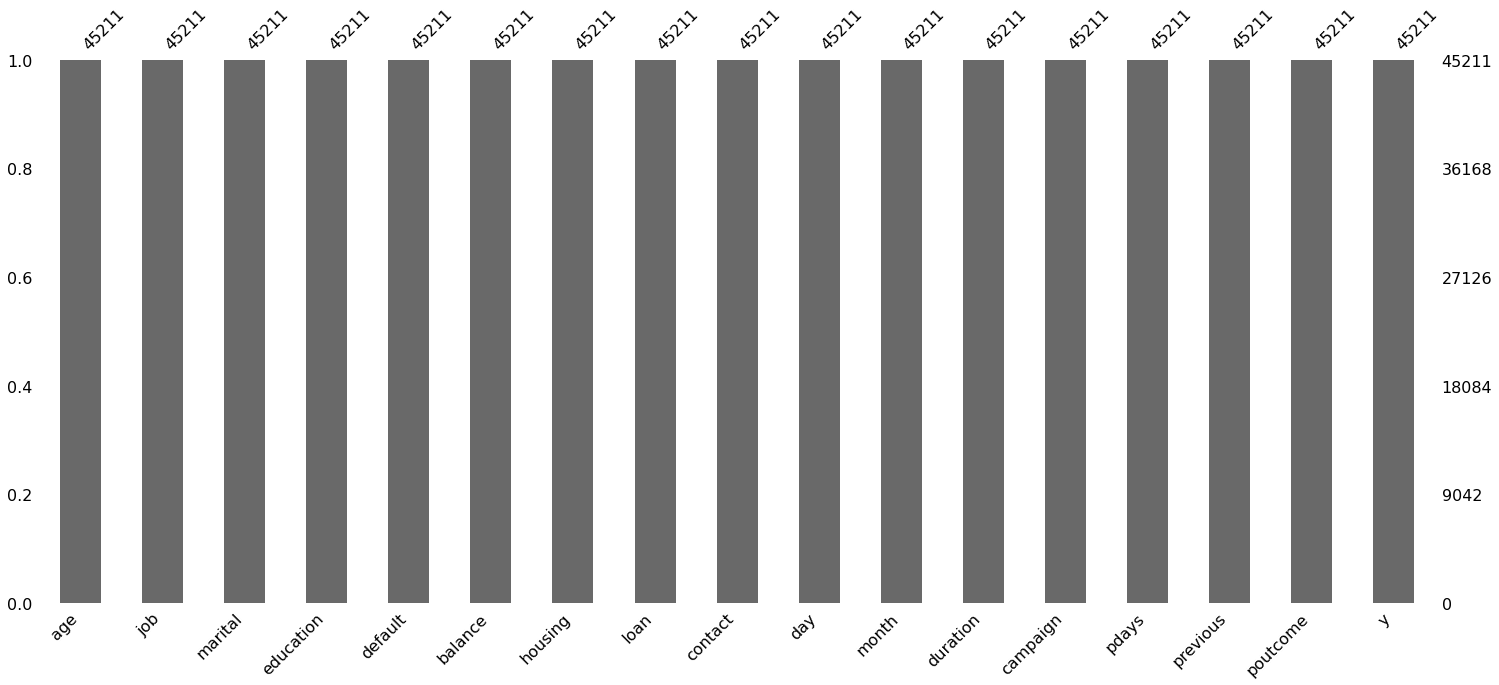

In [3]:
missingno.bar(df)

In [4]:
df["housing"].unique()

array(['yes', 'no'], dtype=object)

In [5]:
dataset = df.rename(columns={'age': 'Idade', 'job': 'Profissão','marital': 'Estado civil','education': 'Nível educacional', 
                            'default':'Inadimplência', 'balance':'Saldo em conta', 'housing': 'Empréstimo habitacional?', 'loan':'Empréstimo pessoal?',
                             'contact':'Tipo de comunicação realizada', 'month':'Mês do último contato','day': 'Dia do último contato','duration': 'Duração do último contato (seg)' ,
                             'campaign': 'Nº de contatos realizados', 'pdays': 'Nº dias do último contato', 'previous': 'Nº de contatos feitos na última campanha',
                             'poutcome':'Resultado última campanha','y': 'Foi feito investimento?'})

In [6]:
dataset.dtypes

Idade                                        int64
Profissão                                   object
Estado civil                                object
Nível educacional                           object
Inadimplência                               object
Saldo em conta                               int64
Empréstimo habitacional?                    object
Empréstimo pessoal?                         object
Tipo de comunicação realizada               object
Dia do último contato                        int64
Mês do último contato                       object
Duração do último contato (seg)              int64
Nº de contatos realizados                    int64
Nº dias do último contato                    int64
Nº de contatos feitos na última campanha     int64
Resultado última campanha                   object
Foi feito investimento?                     object
dtype: object

## Análise exploratória e vizualização dos dados

In [7]:
dataset['Foi feito investimento?'].value_counts()/dataset.shape[0]

no     0.883015
yes    0.116985
Name: Foi feito investimento?, dtype: float64

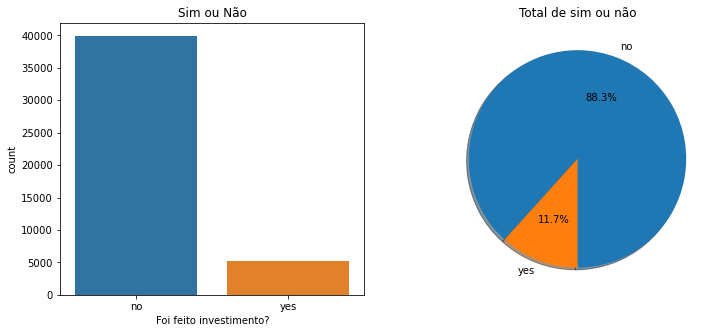

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='Foi feito investimento?',data=dataset)
plt.title("Sim ou Não")
plt.subplot(1,2,2)
labels =dataset['Foi feito investimento?'].value_counts(sort = True).index
sizes = dataset['Foi feito investimento?'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total de sim ou não',size = 12)
plt.show()

- Percebe-se pelos gráficos acima que, cerca de 12% dos clientes fizeram o investimento (depósito). Vamos plotar gráficos de barras para verificar a distribuição de investidores em relação a algumas variáveis do banco de dados.

#### Gráfico de barras

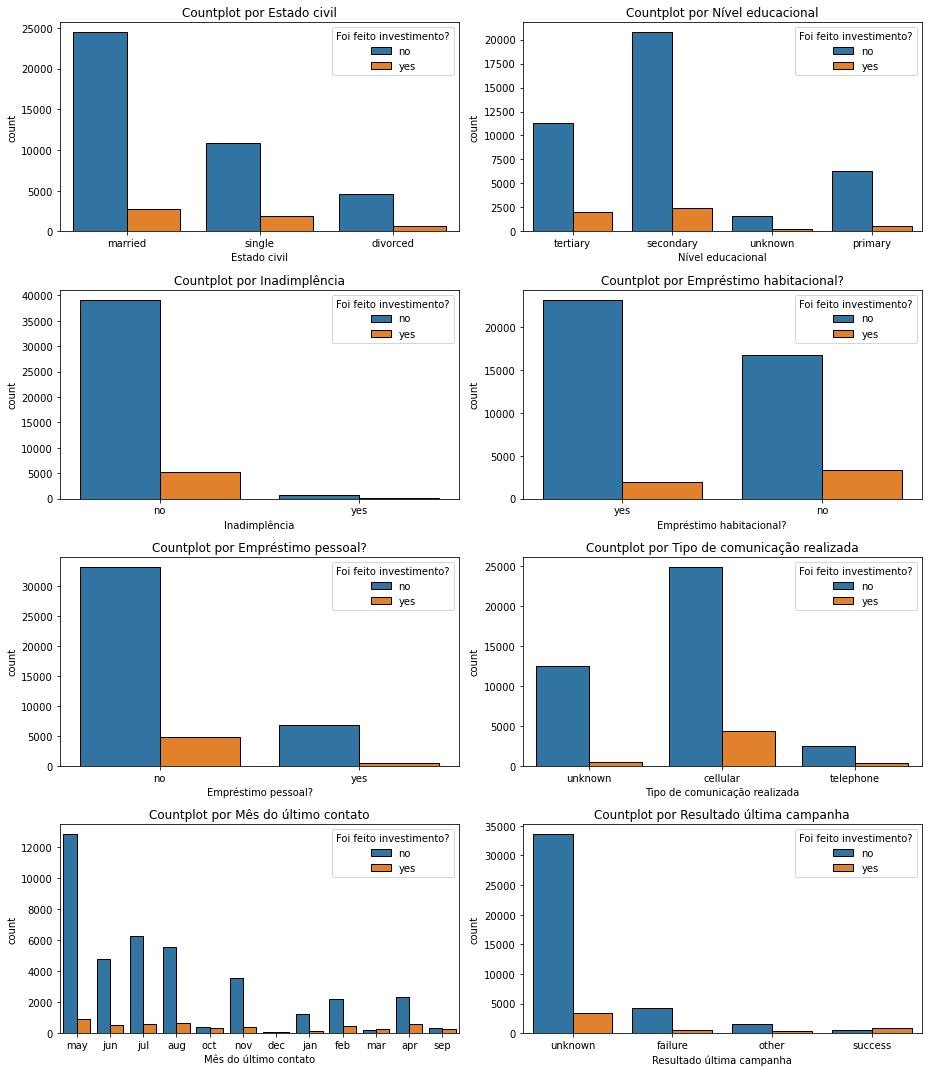

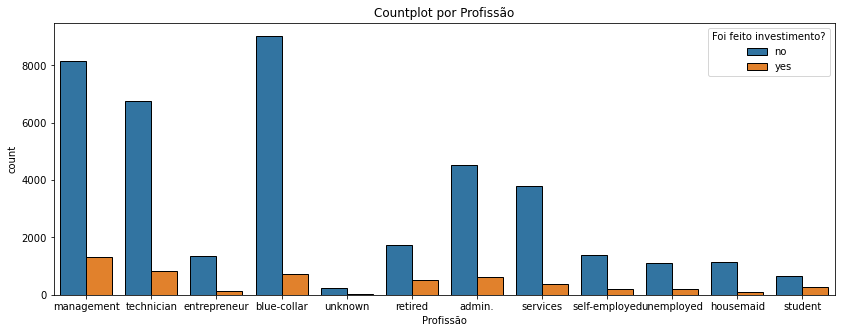

In [9]:
plt.figure(figsize=(13,15))

df_ = dataset.select_dtypes(include='object').columns.drop(["Profissão", "Foi feito investimento?"])

for i, cat in enumerate(df_):
    plt.subplot(4,2,i+1)
    sns.countplot(x=cat, hue='Foi feito investimento?',data=dataset,edgecolor="black")
    plt.title("Countplot por {}".format(cat))
plt.tight_layout()      
plt.show()

plt.figure(figsize=[14,5])
sns.countplot(x='Profissão', hue='Foi feito investimento?',edgecolor="black",data=dataset)
plt.title("Countplot por Profissão")
plt.show()

A partir da observação dos gráficos de colunas, podemos tirar as seguintes conclusões:
- O maior número de intrevistados é <b>casado </b>, porém os <b>solteiros tem o maior número de pessoas</b> que aceitaram investir proporcionalmente.
- O maior número de intrevistados possui o <b>nível de escolaridade secundária e não são inadimplentes</b>.
- A <b>profissão que mais fez investimentos é o "management"</b>, apesar de não ter sido a profissão com maior número de intrevistados.

## Análise de outliers utilizando Boxplot e Z-score

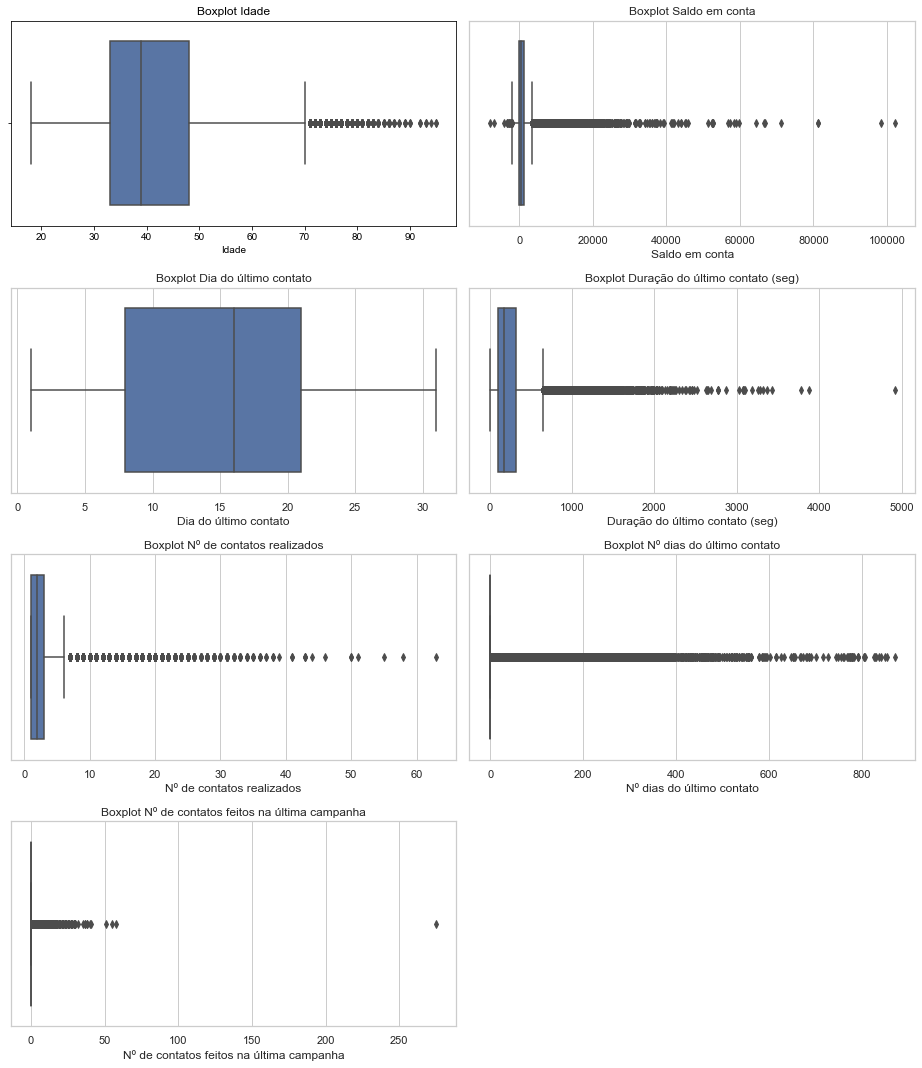

In [11]:
df_1 = dataset[['Idade', 'Saldo em conta', 'Dia do último contato', 'Duração do último contato (seg)', 'Nº de contatos realizados', 
          'Nº dias do último contato', 'Nº de contatos feitos na última campanha']]
plt.figure(figsize=(13,15))

for i,cat in enumerate(df_1):
    plt.subplot(4,2,i+1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=cat, data=dataset)
    plt.title("Boxplot {}".format(cat))
plt.tight_layout()
plt.show()

#### Análise das variáveis e eliminação dos dados discrepantes utilizando z-scores

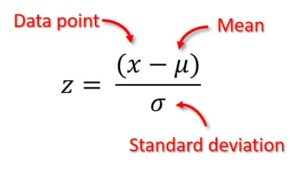
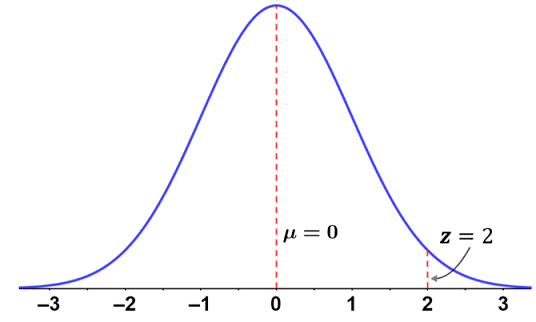

In [12]:
from scipy import stats

z_scores= stats.zscore(df_1)
z_scores

,Idade,Saldo em conta,Dia do último contato,Duração do último contato (seg),Nº de contatos realizados,Nº dias do último contato,Nº de contatos feitos na última campanha
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [13]:
# Aplicaremos eliminação dos dados que obtiverem valores de z_scores > 3
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
dataset = dataset[filtered_entries]
dataset

,Idade,Profissão,Estado civil,Nível educacional,Inadimplência,Saldo em conta,Empréstimo habitacional?,Empréstimo pessoal?,Tipo de comunicação realizada,Dia do último contato,Mês do último contato,Duração do último contato (seg),Nº de contatos realizados,Nº dias do último contato,Nº de contatos feitos na última campanha,Resultado última campanha,Foi feito investimento?
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


#### Bloxplot após a aplicação do Z-scores e eliminação dos dados discrepantes

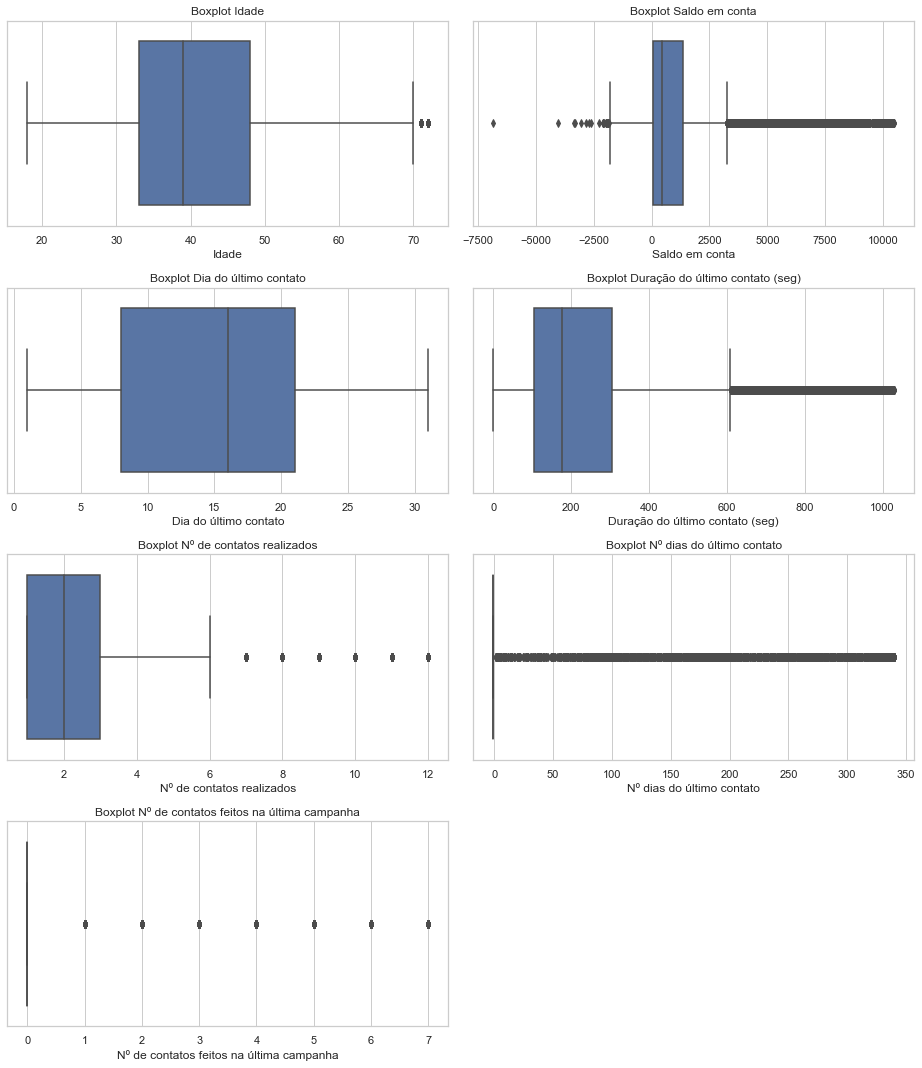

In [15]:
df_1 = dataset[['Idade', 'Saldo em conta', 'Dia do último contato', 'Duração do último contato (seg)', 'Nº de contatos realizados', 
          'Nº dias do último contato', 'Nº de contatos feitos na última campanha']]
plt.figure(figsize=(13,15))

for i,cat in enumerate(df_1):
    plt.subplot(4,2,i+1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=cat, data=dataset)
    plt.title("Boxplot {}".format(cat))
plt.tight_layout()
plt.show()

- Percebe-se agora pelos novos gráficos de Boxplot que a distribuição dos dados melhorou e os outliers mais discrepantes foram eliminados utilizando a técnica Z-scores. Essa técnica eliminou cerca de 5.000 linhas do nosso banco de dados.

## Codificando as variáveis categóricas

In [16]:
# As variáveis: job, education, poutcome, contact, marital e month são variáveis categoricas e precisaram sem transformadas utilizando a função OneHotEncoder
dataset1 = pd.get_dummies(dataset, columns = ['Profissão', 'Nível educacional', 'Estado civil', 'Tipo de comunicação realizada', 'Resultado última campanha'])

In [17]:
# As variáveis categóricas: "Inadimplência", "Empréstimo habitacional?", "Empréstimo pessoal?", "Foi feito investimento?" também devem ser transormadas em variáveis bionárias (0 ou 1)
from sklearn.preprocessing import LabelEncoder
var_cat = ["Inadimplência", "Empréstimo habitacional?", "Empréstimo pessoal?", "Foi feito investimento?", "Mês do último contato"]

for i in var_cat:
    le =LabelEncoder()
    dataset1[i]=le.fit_transform(dataset1[i].values)

In [18]:
display(dataset1)

,Idade,Inadimplência,Saldo em conta,Empréstimo habitacional?,Empréstimo pessoal?,Dia do último contato,Mês do último contato,Duração do último contato (seg),Nº de contatos realizados,Nº dias do último contato,...,Estado civil_divorced,Estado civil_married,Estado civil_single,Tipo de comunicação realizada_cellular,Tipo de comunicação realizada_telephone,Tipo de comunicação realizada_unknown,Resultado última campanha_failure,Resultado última campanha_other,Resultado última campanha_success,Resultado última campanha_unknown
0,58,0,2143,1,0,5,8,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,8,151,1,-1,...,0,0,1,0,0,1,0,0,0,1
2,33,0,2,1,1,5,8,76,1,-1,...,0,1,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,8,92,1,-1,...,0,1,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,8,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,0,113,0,0,17,9,266,1,-1,...,0,0,1,1,0,0,0,0,0,1
45205,25,0,505,0,1,17,9,386,2,-1,...,0,0,1,1,0,0,0,0,0,1
45206,51,0,825,0,0,17,9,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,9,456,2,-1,...,1,0,0,1,0,0,0,0,0,1


### Divisão do banco de dados em treinamento e teste

In [19]:
from sklearn.model_selection import train_test_split
X = dataset1.drop("Foi feito investimento?", axis=1)
y = dataset1["Foi feito investimento?"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 0)

## Padronização dos dados


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [22]:
print(X_train)

[[ 1.13118777 -0.13604599 -0.62227514 ... -0.17286659 -0.1732731
   0.40625613]
 [-0.55776113 -0.13604599 -0.58503237 ... -0.17286659 -0.1732731
   0.40625613]
 [ 1.52858751 -0.13604599 -0.4587561  ... -0.17286659 -0.1732731
   0.40625613]
 ...
 [-0.65711107 -0.13604599 -0.19165561 ... -0.17286659 -0.1732731
   0.40625613]
 [-0.35906126 -0.13604599 -0.24519209 ... -0.17286659 -0.1732731
   0.40625613]
 [ 1.82663731 -0.13604599  0.26631409 ... -0.17286659 -0.1732731
   0.40625613]]


In [23]:
print(y_train)

41114    0
40276    1
11042    0
38960    1
23126    0
        ..
22092    0
34598    0
32666    0
22610    0
2806     0
Name: Foi feito investimento?, Length: 30156, dtype: int32


## Treinamento do modelo de Florestas Aleatórias

In [24]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classificador.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

### Matriz de confusão e acurácia do modelo

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
y_pred = classificador.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("A acurácia do modelo foi de:  {:.2f}".format(accuracy_score(y_test, y_pred)))
print("O recall do modelo foi de:  {:.2f}".format(recall_score(y_test, y_pred)))
print("A precisão do modelo foi de:  {:.2f}".format(precision_score(y_test, y_pred)))

[[8904  176]
 [ 672  301]]
A acurácia do modelo foi de:  0.92
O recall do modelo foi de:  0.31
A precisão do modelo foi de:  0.63


Percebe-se que o modelo, apesar de ter obtido uma <b>boa acurácia (92%)</b>, os valores das métricas: <i>recall</i> e precisão foram baixos. Além disso, através da análise da matriz de confusão, é percepitível que o modelo errou muito a previsão da classe "sim" ou "1", onde, de 973 da classe "sim" , o modelo acertou em apenas 301 oportunidades.

Isso indica que o modelo apresentou o <b>paradóxo da acurácia</b>, ou seja, mesmo o modelo apresentando a acurácia elevada, este apresenta falhas elevadas quando na predição da classe minoritária dos dados.

Uma estratégia de solucionar esse paradóxido nos modelos de classificação é realizar a reestruturação dos dados, nesse caso em específico será utilizado o <i>undersampling</i>, utilizando a biblioteca <i> imblearn </i>. 
Método que consiste na redução do número de observações da classe majoritária para diminuir a diferença entre as categorias. Esse método irá unir as observações similares em apenas uma, o que acarreta em uma menor perda de infomações do banco de dados.

## Reestruturando o banco de dados e aplicando um novo treinamento ao modelo

In [26]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X, y = nm1.fit_resample(X, y)

In [27]:
y.value_counts()/y.shape[0]

0    0.5
1    0.5
Name: Foi feito investimento?, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classificador.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
y_pred = classificador.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("A acurácia do modelo foi de:  {:.2f}".format(accuracy_score(y_test, y_pred)))
print("O recall do modelo foi de:  {:.2f}".format(recall_score(y_test, y_pred)))
print("A precisão do modelo foi de:  {:.2f}".format(precision_score(y_test, y_pred)))

[[907  86]
 [ 87 947]]
A acurácia do modelo foi de:  0.91
O recall do modelo foi de:  0.92
A precisão do modelo foi de:  0.92


Após a aplicação da técnica de <i> undersampling</i> e treinando novamente o modelo de Florestas Aleatórias, os valores das métricas de avaliação do modelo: <b><i>recall</i> e precisão alcançaram valores satisfatórios</b>.

A matriz de confusão também indica uma <b>maior taxa de acerto para a classe "sim", aumentando significativamente em comparação ao modelo anterior</b>, treinado com os dados antes da aplicação da técnica de <i> undersampling</i>.

### Visualizando o resultado dos dados de treinamento

In [32]:
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


## Visualizando as variáveis mais importantes na classificação feita pelo modelo de Florestas aleatórias

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classificador1 =RandomForestClassifier(random_state=0,n_estimators=100, criterion='entropy')
classificador1.fit(X_train, y_train)

#calculate and print scores for the model for top 15 features
y_train_preds = classificador1.predict(X_train)
y_test_preds = classificador1.predict(X_test)

In [34]:
feature_names = [f"feature {i}" for i in range(dataset1.shape[1])]

In [35]:
import numpy as np

importances = classificador1.feature_importances_
std = np.std([tree.feature_importances_ for tree in classificador1.estimators_], axis=0)

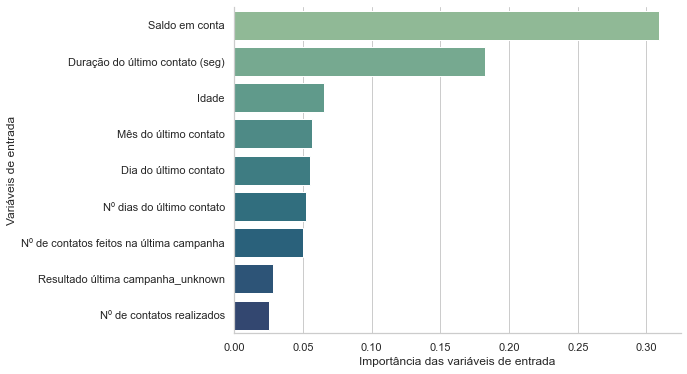

In [36]:
plt.figure(figsize=(8,6))
importances= classificador1.feature_importances_
feature_importances= pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:9], y=feature_importances.index[0:9], palette="crest")
sns.despine()
plt.xlabel("Importância das variáveis de entrada")
plt.ylabel("Variáveis de entrada")
plt.show()

<b>Conclusão:</b>

O modelo de florestas aleatórias considerou como variáveis mais importantes para a classificação dos clientes:
- <b> Saldo em conta</b>
- <b> Duração do último contato (seg)</b>
- <b> Idade</b>

Vamos estudar um pouco o comportamento dessas três variáveis...

## Comportamento das variáveis mais significativas

### Saldo em conta

In [81]:
#Calculando a soma de observações em cada grupo separado pelo valor disponível em conta
df1 = pd.DataFrame()
df1['Saldo em conta']= dataset1['Saldo em conta']
df1['Foi feito investimento?']= dataset1['Foi feito investimento?']

df1['Grupos'] = pd.qcut(df1['Saldo em conta'], q=10, precision=0,duplicates ='drop')
mean_deposit = df1.groupby(['Grupos'])['Foi feito investimento?'].sum()
mean_deposit.sort_values(ascending=False).head(10)

Grupos
(3204.0, 10483.0]    576
(1736.0, 3204.0]     575
(1064.0, 1736.0]     463
(670.0, 1064.0]      437
(260.0, 430.0]       418
(430.0, 670.0]       401
(123.0, 260.0]       392
(-6848.0, 0.0]       377
(19.0, 123.0]        314
(0.0, 19.0]          101
Name: Foi feito investimento?, dtype: int32

<b> Conclusão</b>:

Os grupos que mais investiram tinham em conta <b>mais de R$ 1064,00</b> em conta. 

### Duração do último contato (seg)

In [82]:
#Calculando a soma de observações em cada grupo separado pela duração do contato
df1['Duração do último contato (seg)']= dataset1['Duração do último contato (seg)']

df1['Grupos2'] = pd.qcut(df1['Duração do último contato (seg)'], q=10, precision=0,duplicates ='drop')
mean_deposit = df1.groupby(['Grupos2'])['Foi feito investimento?'].sum()
mean_deposit.sort_values(ascending=False).head(10)

Grupos2
(502.0, 1030.0]    1514
(352.0, 502.0]      695
(271.0, 352.0]      477
(218.0, 271.0]      450
(178.0, 218.0]      321
(146.0, 178.0]      253
(117.0, 146.0]      175
(90.0, 117.0]       109
(61.0, 90.0]         54
(-1.0, 61.0]          6
Name: Foi feito investimento?, dtype: int32

<b> Conclusão</b>:

Percebe-se que, quanto mais tempo durar o contato com o cliente maior as chances deste fazer o investimento, onde, contatos prolongados para <b> mais de 502 segundos </b> tiveram a maior incidência dentro das observações.

### Idade

In [83]:
#Calculando a soma de observações em cada grupo separado pela duração do contato
df1['Idade']= dataset1['Idade']

df1['Grupos2'] = pd.qcut(df1['Idade'], q=10, precision=0,duplicates ='drop')
mean_deposit = df1.groupby(['Grupos2'])['Foi feito investimento?'].sum()
mean_deposit.sort_values(ascending=False).head(10)

Grupos2
(17.0, 29.0]    783
(56.0, 72.0]    549
(31.0, 34.0]    498
(50.0, 56.0]    374
(36.0, 39.0]    347
(29.0, 31.0]    333
(42.0, 46.0]    330
(34.0, 36.0]    308
(46.0, 50.0]    282
(39.0, 42.0]    250
Name: Foi feito investimento?, dtype: int32

<b> Conclusão</b>:

Os maiores investidores estão na faixa de idade de<b> 17 a 29 anos</b> e <b>56 a 72 anos</b>.